
# **Analisis Prediktif**: Prediksi Pelanggan Yang Berpeluang Lebih Besar Membayar Hutang

##### Oleh : Muhammad Rionando D
##### Proyek Submission 1 - Machine Learning Terapan Dicoding


# **Pendahuluan**

Pada proyek ini, topik yang dibahas adalah mengenai dunia perbankan yang dibuat untuk memprediksi pelanggan mana yang memiliki peluang lebih besar untuk membyar hutang berdasarkan variabel-variabel yang ada.

# **1. Mengimpor pustaka/modul python yang dibutuhkan**

In [1]:
# Memasang modul plotly & scikit-learn terbaru
!pip install -U plotly
!pip install -U scikit-learn

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 23.2 MB 5.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import missingno as msno

# Untuk pembuatan model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score
from sklearn import metrics

# **2. Mempersiapkan Dataset**

In [3]:
#install kaggle library 
!pip install kaggle

In [4]:
#upload file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muahammadrionandod","key":"d0c9f1dfec82f6af90fcc9cc62f00bc5"}'}

In [5]:
#kaggle setup
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
#upload dataset 
!kaggle datasets download -d itsmesunil/bank-loan-modelling

  0% 0.00/331k [00:00<?, ?B/s]
100% 331k/331k [00:00<00:00, 48.5MB/s]


In [7]:
#mengekstrak dataset
!unzip /content/bank-loan-modelling.zip

Archive:  /content/bank-loan-modelling.zip
  inflating: Bank_Personal_Loan_Modelling.xlsx  


# **3. Pemahaman Data** ***(Data Understanding)***

## 3.1 Memuat Data pada sebuah Dataframe menggunakan *pandas*

In [8]:
#memuat dataset dan menampilkan data sekilas
df = pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx",'Data')
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## 3.2 Keterangan kolom pada dataset

In [9]:
#Memuat informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# Menghitung null pada setiap kolom
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#mendiskripsikan dataframe
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
#mengetahui jumlah dataset
df.shape

(5000, 14)

In [13]:
#mengetahui type data
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [14]:
#mengecek unique value tiap variabel
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## 3.3 Exploratory Data Analysis (EDA)

Berdasarkan unique value kita membagi data menjadi varibel kategori dan numerik

In [15]:
variable_kategori=[col for col in df.columns if df[col].nunique()<=5]
print(variable_kategori)
variabe_numerik=[col for col in df.columns if df[col].nunique()>5]
print(variabe_numerik)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


kita akan menghapus variabel personal loan karena merupakan variabel dependen dan ID karena tidak berpengaruh ke modelling

In [16]:
variable_kategori.remove("Personal Loan")
print(variable_kategori)
variabe_numerik.remove("ID")
print(variabe_numerik)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


Variabel Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

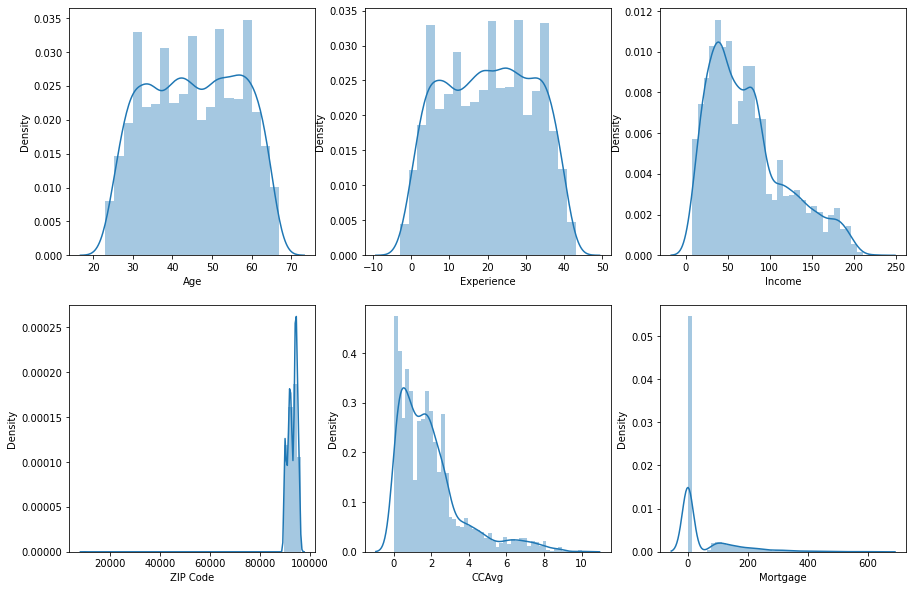

In [17]:
#menampilkan grafik distribusi data variabel numerik
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(variabe_numerik):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

1. variabel **'age'** dan **'experience'** berdistribusi normal
2. varibael **'income''CCAvg' dan 'mortgage'** memiliki kemiringan positif
3. variabel **ZIP code** memiliki kemiringan negatif


Variabel Kategori

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

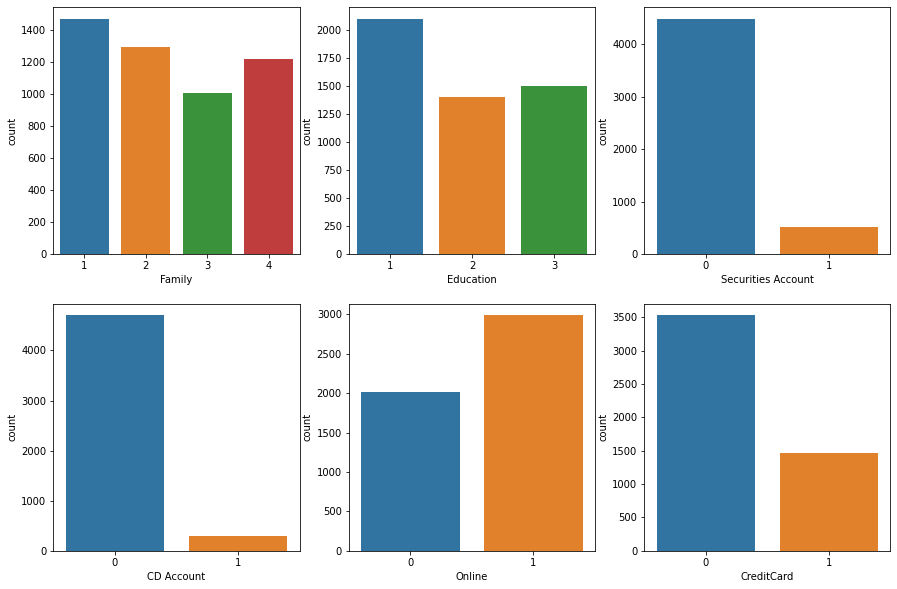

In [18]:
#memvisualisasikan data kategori
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(variable_kategori):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(df[col])

1. Kebanyakan pelanggan tidak memiliki **Securities Account, CD Account dan CreditCard**
2. Kebanyakan pelanggan menggunakan** internet banking**
3. Persebaran **tipe keluarga** di dominasi tipe 1 dan 2

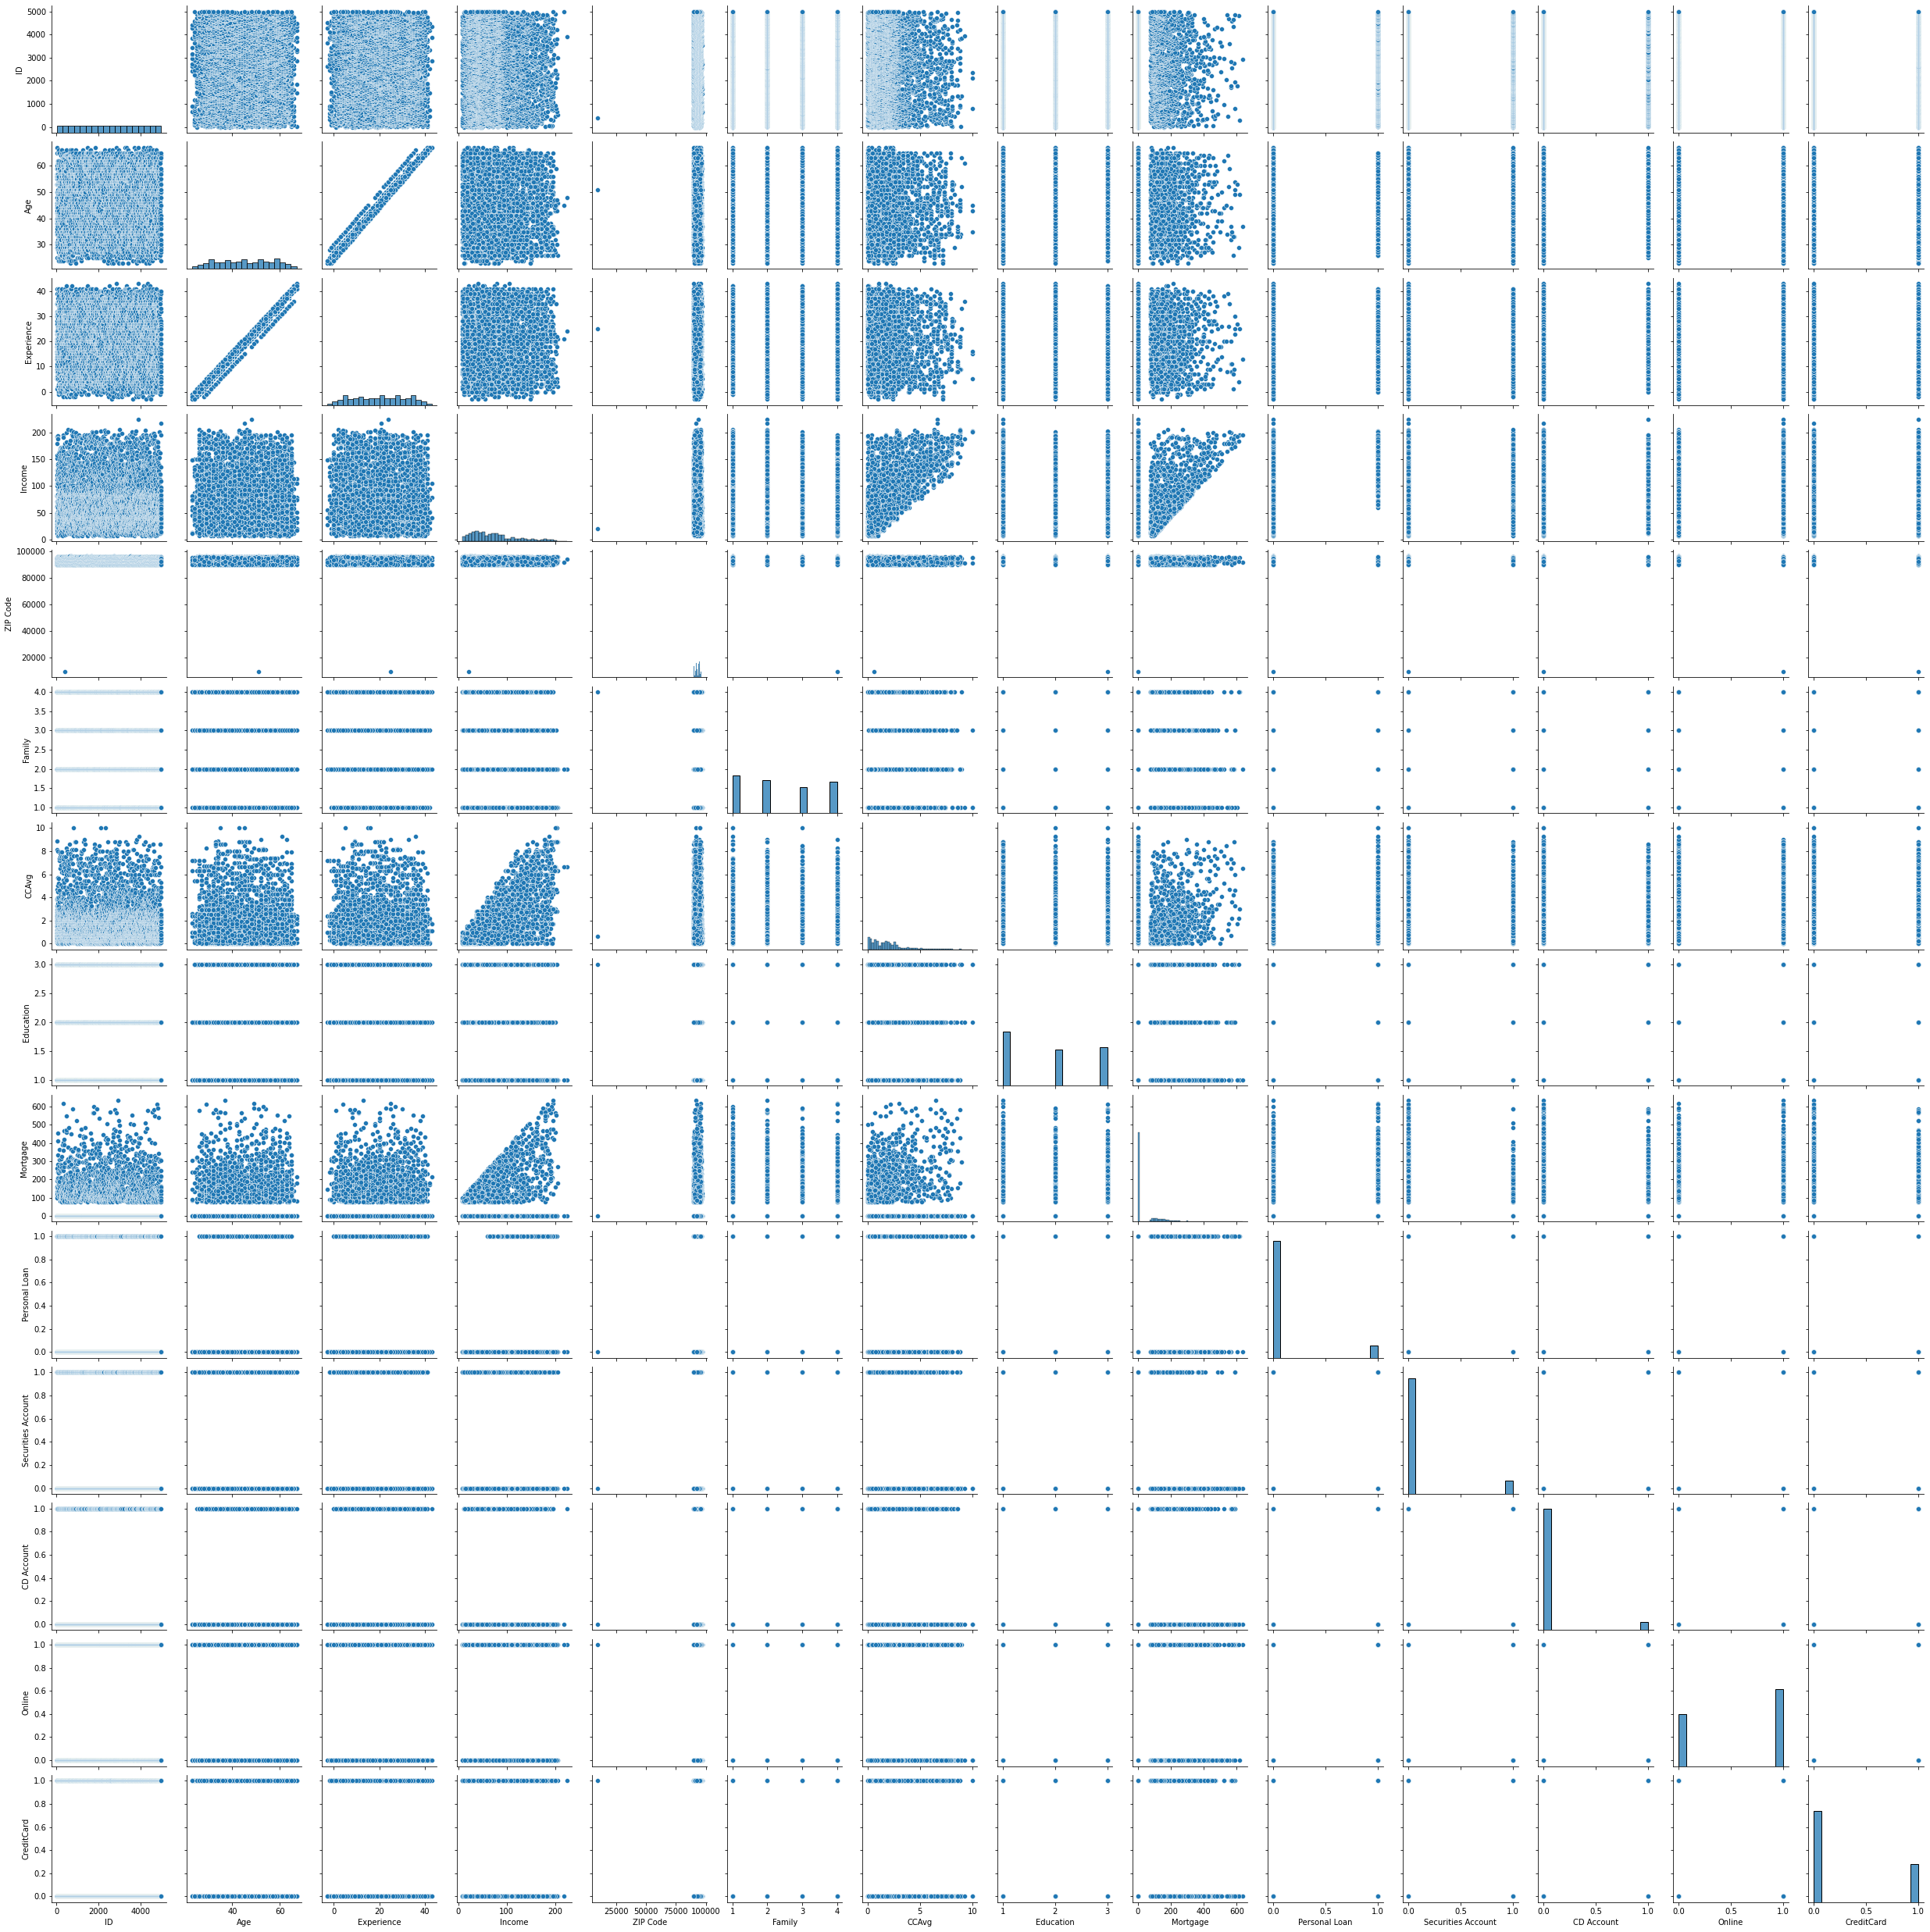

In [19]:
# mengamati hubungan antar fitur dengan fungsi pairplot
sns.pairplot(df)

1. Variable **'age'** beridistribusi normal dengan rata rata usia antara 30-60 tahun

2. Variabel **'Experience'** berdistribusi normal dan banyak customer yang memiliki pengalaman mulai 8 tahun. 

3. Variabel **Income** memiliki kemiringan positif. mayoritas pelanggan memiliki pemasukan antara 45K-55K. 

4. Variabel **CCAvg** juga memiliki kemiringan positif dan rata rata pengeluaran antara 0K-10K dan mayoritas kurang dari 2.5K.

5. Variabel **Mortgage** 70% pelanggan memiliki mortgage kurang dari 40K. Namun nilai maksimalnya adalah 635K.


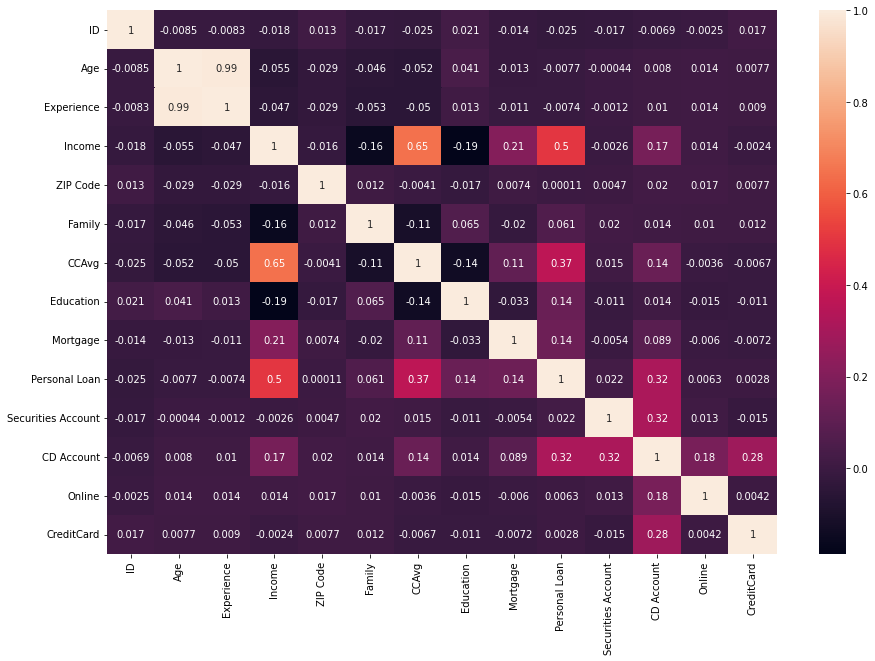

In [20]:
#mengecek korelasi antar variabel
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

1. Variabel **Income dan CCAvg** memiliki korelasi yang cukup tinggi
2. Variabel **Age dan Experience** memiliki korelasi yang sangat tinggi

# Data Cleaning

In [21]:
#membuang data yang terduplikat
df.drop_duplicates(inplace=True)

In [22]:
#Mengecek baris dan kolom
df.shape

(5000, 14)

In [23]:
#menampilkan data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# **4. Persiapan Data** ***(Data Preparation)***

## 4.1 Train Test Split

In [24]:
#menentukan x dan y
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [25]:
#Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [26]:
#menampilkan x train
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4833,4834,49,24,109,92647,1,0.6,1,0,0,0,0,0
1218,1219,62,36,98,92122,2,2.8,1,0,0,0,0,0
135,136,58,33,45,93010,4,2.1,1,0,0,0,1,1
3612,3613,50,25,99,90245,1,4.6,1,368,1,1,0,1
3259,3260,33,8,54,92251,3,2.3,1,0,0,0,0,1


## 4.1 Standarisasi Scaller

In [27]:
# Inisialisasi fungsi StandardScaler
scaler=StandardScaler()

In [28]:
#standarisasi pada x train
X_train[['Age','Income','Family','CCAvg','Education','Mortgage']]=scaler.fit_transform(X_train[['Age','Income','Family','CCAvg','Education','Mortgage']])

In [29]:
#menampilkan data
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4833,4834,0.311004,24,0.786875,92647,-1.224605,-0.760424,-1.056708,-0.560888,0,0,0,0
1218,1219,1.448848,36,0.546269,92122,-0.352690,0.504976,-1.056708,-0.560888,0,0,0,0
135,136,1.098742,33,-0.613015,93010,1.391141,0.102349,-1.056708,-0.560888,0,0,1,1
3612,3613,0.398530,25,0.568142,90245,-1.224605,1.540303,-1.056708,3.116773,1,1,0,1
3259,3260,-1.089420,8,-0.416155,92251,0.519226,0.217385,-1.056708,-0.560888,0,0,0,1


In [30]:
#standarisasi x test
X_test[['Age','Income','Family','CCAvg','Education','Mortgage']]=scaler.fit_transform(X_test[['Age','Income','Family','CCAvg','Education','Mortgage']])
X_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,790,-1.371314,3,-0.971001,92126,1.423145,-0.955120,0.164537,-0.536990,0,0,1,0
2507,2508,1.215258,34,-0.355745,90048,1.423145,0.055391,-1.019182,1.629636,0,0,1,1
2376,2377,1.129039,33,-1.140727,91768,0.553252,-1.011259,-1.019182,-0.536990,0,0,0,0
1378,1379,0.784163,29,-0.907354,93305,1.423145,-1.067399,1.348256,-0.536990,0,0,1,0
598,599,0.956601,31,-1.395316,92374,-0.316641,-1.011259,1.348256,0.296328,0,0,0,0


In [31]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(4000, 13)
(1000, 13)


In [32]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

# **5. Pembuatan Model**

## 5.1 Model Decision Tree

In [33]:
#pembuatan model
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()

In [34]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
# Pengujian model terhadap data test
yhat_tree=tree.predict(X_test)

In [36]:
# mengecek hasil accuracy
tree_accuracy=accuracy_score(y_test,yhat_tree)
model_accuracy_score.append(tree_accuracy)
tree_accuracy

0.975

In [37]:
#melihat hasil report klasifikasi
print(classification_report(y_test,yhat_tree))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       891
           1       0.91      0.85      0.88       109

    accuracy                           0.97      1000
   macro avg       0.95      0.92      0.93      1000
weighted avg       0.97      0.97      0.97      1000



## 5.2 Model Random Forest

In [38]:
#pembuatan model
model_list.append('RandomForestClassifier')
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
# Pengujian model terhadap data test
yhat_forest=forest.predict(X_test)

In [40]:
#melihat skor akurasi
forest_accuracy=accuracy_score(y_test,yhat_forest)
model_accuracy_score.append(forest_accuracy)
forest_accuracy

0.978

In [41]:
#melihat hasil report klasifikasi
print(classification_report(y_test,yhat_forest))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       891
           1       0.99      0.81      0.89       109

    accuracy                           0.98      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.98      0.98      0.98      1000



## 5.3 Model KNN

In [42]:
#pembuatan model
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()
neighbour.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
# Pengujian model terhadap data test
yhat_neighbour=neighbour.predict(X_test)

In [44]:
#melihat skor accuracy
neighbour_accuracy=accuracy_score(y_test,yhat_neighbour)
model_accuracy_score.append(neighbour_accuracy)
neighbour_accuracy

0.887

In [45]:
#melihat reort klasifikasi
print(classification_report(y_test,yhat_neighbour))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       891
           1       0.00      0.00      0.00       109

    accuracy                           0.89      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.79      0.89      0.84      1000



# **6. Evaluasi Model**

## 6.1 Perbandingan metriks antara model

In [46]:
#membandingkan hasil accuracy
models = pd.DataFrame({
    'Model': ['KNN','Random Forest','Decision Tree'],
    'Score': [neighbour_accuracy, forest_accuracy, tree_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.978
2,Decision Tree,0.975
0,KNN,0.887


Berdasarkan hasil perbandingan accuracy random forest merupakan model terbaik

## 6.2 Confussion matrix

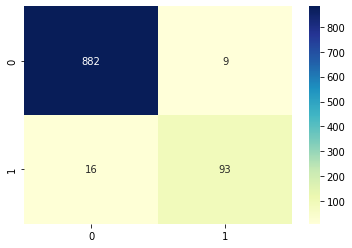

In [47]:
#confussion matrix model decision tree
sns.heatmap(confusion_matrix(y_test,yhat_tree),annot=True,fmt='',cmap='YlGnBu')

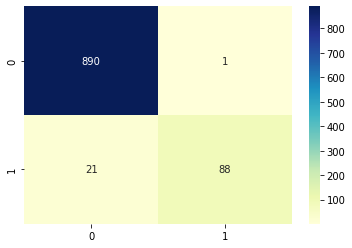

In [48]:
#confussion matrix model Random forrest
sns.heatmap(confusion_matrix(y_test,yhat_forest),annot=True,fmt='',cmap='YlGnBu')

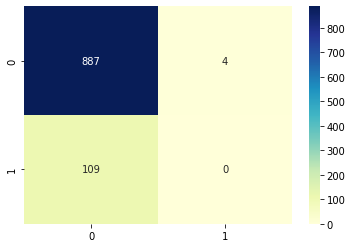

In [49]:
#confussion matrix model KNN
sns.heatmap(confusion_matrix(y_test,yhat_neighbour),annot=True,fmt='',cmap='YlGnBu')

# Penutupan

Model untuk memprediksi pelanggan yang berpotensi membayar hutang telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. 


### *Referensi*
- Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html
- Dokumentasi Plotly : https://plotly.com/python/
- Lainnya :
  - https://www.kaggle.com/aarjavkumarjain/bank-personal-loan-model#Data-Visualizationwater-quality-analysis-plotly-and-modelling
  - https://www.kaggle.com/adityakadiwal/eda-and-personal-loan-prediction-acc-97-5
  - https://www.kaggle.com/itsmesunil/campaign-for-selling-personal-loans
  - https://www.kaggle.com/romwill/bank-looking-for-clients
  - https://www.kaggle.com/dikshasingh19/bank-loan-model-using-decisiontreeclassifier#Scaling